### Loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
print("Libraries imported")

Libraries imported


### Loading Preprocessed data

In [2]:
df = pd.read_csv('data/heart_disease.csv')
X = df.drop(columns='num')
y = df['num']
print("Data loaded")
print(df.describe())

Data loaded
               ca        thal         age         sex          cp    trestbps  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.665563    4.715232   -0.004609    0.682119    3.158940    0.003145   
std      0.935142    1.937143    1.000093    0.466426    0.961676    1.001817   
min      0.000000    3.000000   -2.819115    0.000000    1.000000   -2.145037   
25%      0.000000    3.000000   -0.713556    0.000000    3.000000   -0.665300   
50%      0.000000    3.000000    0.117585    1.000000    3.000000   -0.096170   
75%      1.000000    7.000000    0.727089    1.000000    4.000000    0.472960   
max      3.000000    7.000000    2.500191    1.000000    4.000000    3.887739   

             chol         fbs     restecg     thalach       exang     oldpeak  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    -0.020326    0.149007    0.986755   -0.001507    0.327815   -0.001601   
std      0.9386

### PCA initializing and fitting

In [3]:
pca = PCA()
pca.fit_transform(X)

array([[ 1.31451105,  0.33476605,  1.70696668, ...,  0.36382573,
        -0.29307663,  0.61333298],
       [ 0.15387191,  3.9881256 , -0.32692034, ...,  0.69739155,
        -0.07829135, -0.5004885 ],
       [ 3.22290242,  1.03482375, -0.9302278 , ...,  0.17571526,
         0.31603751, -0.18751114],
       ...,
       [ 2.63895221, -0.93375464, -1.72799265, ...,  0.18975473,
         0.30621318, -0.21497567],
       [-2.06166191,  0.52095938,  0.92915318, ..., -0.19091155,
         0.33386307, -0.31131565],
       [-2.47591597, -1.73773916, -0.057304  , ...,  0.11849324,
        -0.25583523, -0.1394347 ]], shape=(302, 13))

### PCA visualization

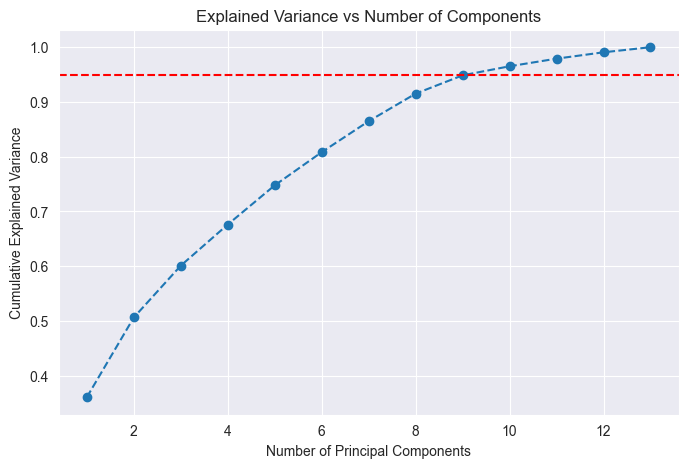

In [4]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--') 
plt.show()


Observation: 9 is the optimal number of principal components but will choose 2 and 3 for visualization

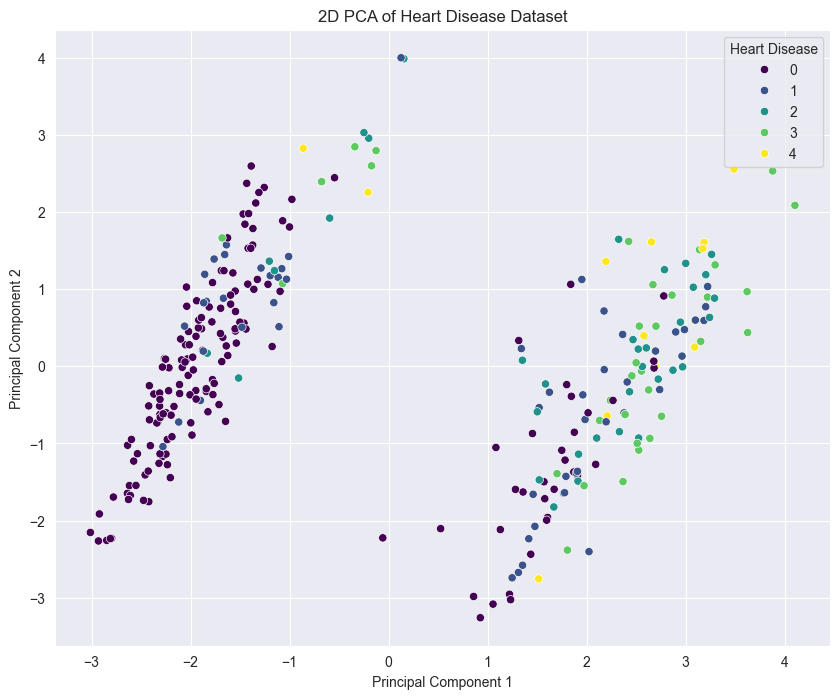

In [5]:

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)


df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])


df_pca_2d['target'] = y

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca_2d, palette='viridis')
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.show()

3 components Visualization (interactive)

In [6]:
import pandas as pd
from sklearn.decomposition import PCA


pca_3d = PCA(n_components=3)


X_pca_3d = pca_3d.fit_transform(X)


df_pca_3d = pd.DataFrame(
    data=X_pca_3d, 
    columns=['PC1', 'PC2', 'PC3']
)


df_pca_3d['target'] = y.reset_index(drop=True)


import plotly.express as px


fig = px.scatter_3d(
    data_frame=df_pca_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='target',  
    title='Interactive 3D PCA of Heart Disease Dataset',
    labels={'target': 'Heart Disease'}, 
    template='plotly_white' 
)


fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40)
)


fig.show()

save the data for future use, saved the 2d since it can be easily visualized

In [7]:
df_pca_2d.to_csv("data/pca_data", index=False)